<a href="https://colab.research.google.com/github/h-khandahari/sensory-gan/blob/master/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Syncing GitHub

In [4]:
from getpass import getpass
import os
user = getpass('github user')
password = getpass('github password')
os.environ['GITHUB_AUTH'] = user + ':' + password

!git clone https://$GITHUB_AUTH@github.com/h-khandahari/sensory-gan

github user··········
github password··········
Cloning into 'sensory-gan'...
remote: Enumerating objects: 406, done.
remote: Counting objects: 100% (406/406), done.
remote: Compressing objects: 100% (400/400), done.
remote: Total 406 (delta 5), reused 396 (delta 2), pack-reused 0
Receiving objects: 100% (406/406), 69.93 MiB | 11.22 MiB/s, done.
Resolving deltas: 100% (5/5), done.
Checking out files: 100% (370/370), done.


In [8]:
from trainer import Trainer
from gan import GAN
from DataLoader import DataLoader
from DataHandler import DataHandler
from utils import create_directories

Using TensorFlow backend.


In [0]:
features = ["userAcceleration.x", "userAcceleration.y", "userAcceleration.z"]
act_labels = ["jog"]#,"ups","wlk", "jog", "sit", "std"]


train_loader = DataLoader()
train_ts, test_ts,num_features, num_act_labels = train_loader.extract_from_csv(features, act_labels, verbose=True)


train_data, act_train_labels = train_loader.time_series_to_section(train_ts.copy(),
                                                                   num_act_labels,
                                                                   sliding_window_size=200,
                                                                   step_size_of_sliding_window=10)

test_data, act_test_labels = train_loader.time_series_to_section(test_ts.copy(),
                                                                 num_act_labels,
                                                                 sliding_window_size=200,
                                                                 step_size_of_sliding_window=10)

print("---Data is successfully loaded")
handler = DataHandler(train_data, test_data)
norm_train = handler.normalise("train")
norm_test = handler.normalise("test")

print("--- Shape of Training Data:", train_data.shape)
print("--- Shape of Test Data:", test_data.shape)


W0905 14:25:58.906910 140414504396672 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:66: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0905 14:25:58.909275 140414504396672 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:541: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0905 14:25:58.913368 140414504396672 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4432: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0905 14:25:58.986363 140414504396672 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4267: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.

W0905 14:25:58.991634 140414504396672 deprecation_wrapp

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 3, 191, 50)        550       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 191, 50)        12550     
_________________________________________________________________
dense_1 (Dense)              (None, 3, 191, 50)        2550      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 3, 95, 50)         0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 3, 95, 50)         0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 3, 93, 40)         6040      
_________________________________________________________________
dense_2 (Dense)              (None, 3, 93, 40)        

W0905 14:25:59.468107 140414504396672 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:2239: The name tf.image.resize_nearest_neighbor is deprecated. Please use tf.compat.v1.image.resize_nearest_neighbor instead.

/usr/local/lib/python3.6/dist-packages/keras/engine/training.py:493: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'
/usr/local/lib/python3.6/dist-packages/keras/engine/training.py:493: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


0 [DiscLoss/Acc Real: (  0.690482,   0.609375)] 
                       [DiscLoss/Acc Fake: (  0.700314,   0.070312)] 
                       [DiscAcc   0.339844][GenLoss =   0.689161]


/usr/local/lib/python3.6/dist-packages/keras/engine/training.py:493: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


10 [DiscLoss/Acc Real: (  0.691650,   0.585938)] 
                       [DiscLoss/Acc Fake: (  0.694776,   0.453125)] 
                       [DiscAcc   0.519531][GenLoss =   0.698871]
20 [DiscLoss/Acc Real: (  0.695198,   0.414062)] 
                       [DiscLoss/Acc Fake: (  0.688158,   0.625000)] 
                       [DiscAcc   0.519531][GenLoss =   0.711690]
30 [DiscLoss/Acc Real: (  0.698906,   0.289062)] 
                       [DiscLoss/Acc Fake: (  0.682226,   0.757812)] 
                       [DiscAcc   0.523438][GenLoss =   0.716084]
40 [DiscLoss/Acc Real: (  0.697854,   0.335938)] 
                       [DiscLoss/Acc Fake: (  0.681123,   0.828125)] 
                       [DiscAcc   0.582031][GenLoss =   0.720423]
50 [DiscLoss/Acc Real: (  0.697439,   0.359375)] 
                       [DiscLoss/Acc Fake: (  0.680299,   0.789062)] 
                       [DiscAcc   0.574219][GenLoss =   0.726438]
60 [DiscLoss/Acc Real: (  0.696357,   0.414062)] 
                    

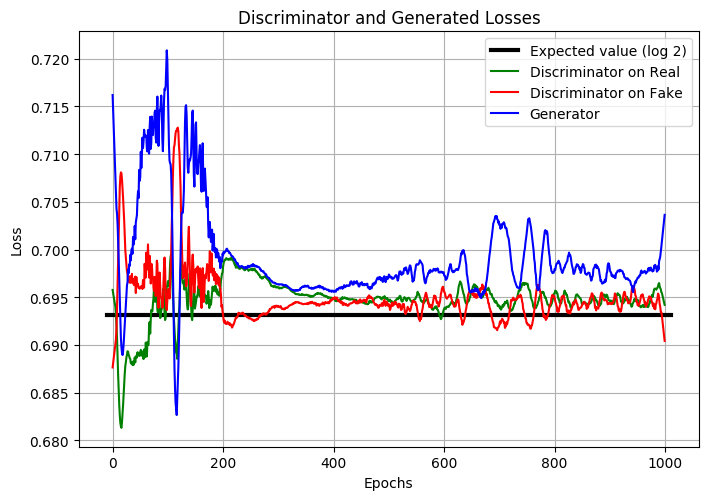

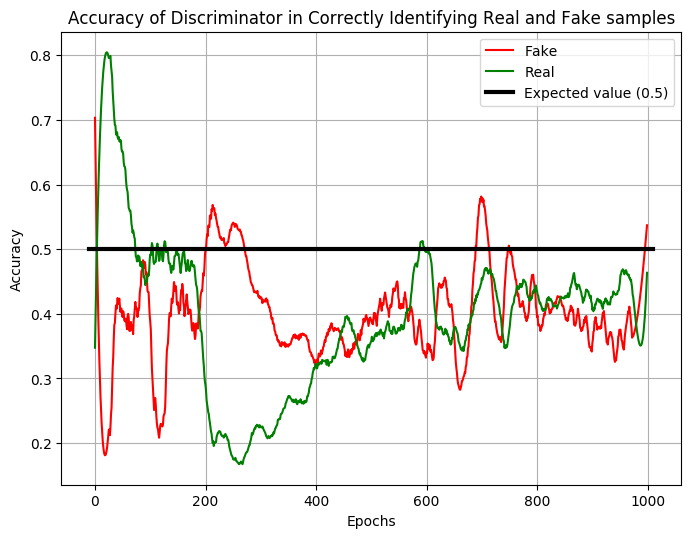

In [0]:
expt_name = "thurs_Script_jog"

create_directories(expt_name)
gan_ = GAN(norm_train.shape)
trainer_ = Trainer(gan_, expt_name)
trainer_.train_gan(epochs=10000, batch_size=128, sample_interval=10, train_data=norm_train)